In [1]:
%matplotlib notebook

In [3]:
from simtoolkit import Simulation
from simtoolkit.visuals import Sphere, EntityVector, EntityOrientation
from simtoolkit.models import Momentum
from simtoolkit.helpers import WGS84, video

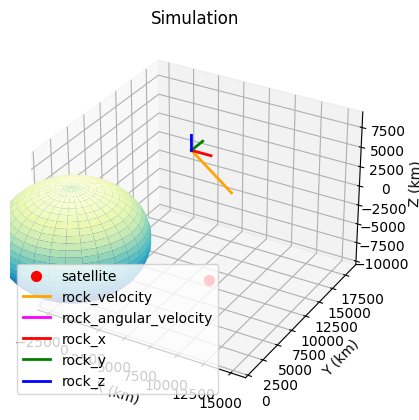

In [ ]:

sim = Simulation()
sim.entity(                                   # Quick way to create & add an Entity to a simulation
    "earth",                                  # Position (and other vectors) default to [0, 0, 0]
    visuals=[Sphere(radius=WGS84.radius)]     # Setting the 'Sphere' visual to draw a globe
)
sim.entity(
    "satellite",                              # Visual defaults to 'Point()', which is a red dot and label
    position=[2*WGS84.radius, 0, 0]           # No models attached to this Entity--it won't move.
)
sim.entity(
    "rock",
    position=[0, 3*WGS84.radius, -1000],
    velocity=[25, -25, 10],                               # Vectors may be used by models (e.i. Momentum)
    angular_velocity=[0.03, 0.03, 0],                        # Or vectors may be ignored
    visuals=[
        EntityVector("velocity", scale=10),                         # EntityVector uses by attribute name to pick a vector
        EntityVector("angular_velocity", color='magenta'),
        EntityOrientation(scale=2000)
    ],
    models=[Momentum()]                                   # Models that will update this entity
)

sim.show()                 # Renders the interactive plot
sim.update(t=10, dt=10)    # Steps the simulation forward in time
sim.show()                 # Must call show() to re-draw the 3D view to match the updated simulation
video(sim, t=100, dt=10)   # Creates a video while updating a simulation
